# Descriptive Statistics and Visualizations for Final Test Set

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "path/to/dataset"
dataset = pd.read_pickle(file_path)
dataset.head()

# Display basic info
dataset.info()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   topics              133 non-null    object
 1   user_input          133 non-null    object
 2   reference_contexts  133 non-null    object
 3   reference           133 non-null    object
 4   synthesizer_name    133 non-null    object
 5   language            133 non-null    object
dtypes: object(6)
memory usage: 6.4+ KB


,topics,user_input,reference_contexts,reference,synthesizer_name,language
0,sports_club,ODTÜ HAT nedir ve ne zaman kuruldu?,[Sports Club Name: ODTÜ HAVACILIK TOPLULUĞU YA...,"ODTÜ HAT nedir? \nODTÜ HAT, ODTÜ Havacılık To...",single_hop_specifc_query_synthesizer,Turkish
1,sports_club,ODTÜ kulübü ve faaliyetleri hakkında daha fazl...,[Sports Club Name: ODTÜ DENİZCİLİK VE YELKEN T...,Spor Kulübü Adı: ODTÜ DENİZCİLİK VE YELKEN TOP...,single_hop_specifc_query_synthesizer,Turkish
2,accomadation,YKS Kayıt Programı kullanarak yurt başvurusu n...,[Application for Dormitories: Students whose f...,Ankara dışında ailesi yaşayan öğrenciler yurtl...,single_hop_specifc_query_synthesizer,Turkish
3,courses,What are the key architectural developments an...,[abea63f4-85ac-4646-ab2c-b2cbc87fdff2\n\nCours...,The ARCH112 course provides a concise survey o...,single_hop_specifc_query_synthesizer,English
4,sports_club,"As the Underwater Research Coordinator, I am i...",[303063e1-3f56-4b2a-aa0d-41b194cbde90\n\nSport...,"The ODTÜ Aikido Topluluğu, through its Childre...",single_hop_specifc_query_synthesizer,English


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Descriptive Statistics

In [4]:
# Generate descriptive statistics
descriptive_stats = dataset.describe(include='all')
print(descriptive_stats)

              topics                           user_input  \
count            133                                  133   
unique             5                                  131   
top     student_club  ODTÜ HAT nedir ve ne zaman kuruldu?   
freq              30                                    2   

                                       reference_contexts  \
count                                                 133   
unique                                                128   
top     [feec27c5-58fb-40c4-9682-26cd10d661f9\n\nGener...   
freq                                                    3   

                                                reference  \
count                                                 133   
unique                                                133   
top     ODTÜ HAT nedir?  \nODTÜ HAT, ODTÜ Havacılık To...   
freq                                                    1   

                            synthesizer_name language  
count                     

### General Statistics

In [5]:
# Count number of unique questions
unique_questions = dataset['user_input'].nunique()

# Average number of contexts per question
average_contexts = dataset['reference_contexts'].apply(lambda x: len(x)).mean()

# Average context length in characters
average_context_length = dataset['reference_contexts'].apply(lambda x: sum(len(ctx) for ctx in x) / len(x)).mean()

# Average answer length in characters
average_answer_length = dataset['reference'].apply(len).mean()

# Display summary statistics
summary_stats = pd.DataFrame({
    'Number of Unique Questions': [unique_questions],
    'Average Contexts per Question': [average_contexts],
    'Average Context Length (characters)': [average_context_length],
    'Average Answer Length (characters)': [average_answer_length]
})

print(summary_stats)

   Number of Unique Questions  Average Contexts per Question  \
0                         131                       1.466165   

   Average Context Length (characters)  Average Answer Length (characters)  
0                           961.518797                          589.586466  


## Visualizations

### Distribution of User Input Lengths

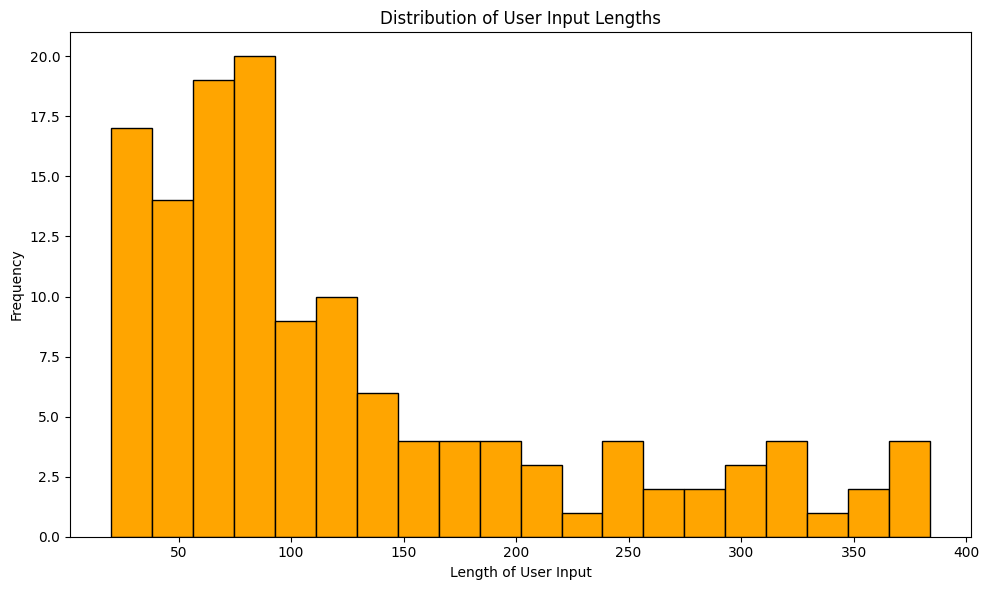

In [6]:
# Generate user input length histogram
user_input_lengths = dataset['user_input'].apply(len)

plt.figure(figsize=(10, 6))
plt.hist(user_input_lengths, bins=20, edgecolor='black', color='#FFA500')
plt.title('Distribution of User Input Lengths')
plt.xlabel('Length of User Input')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Distribution of Topics

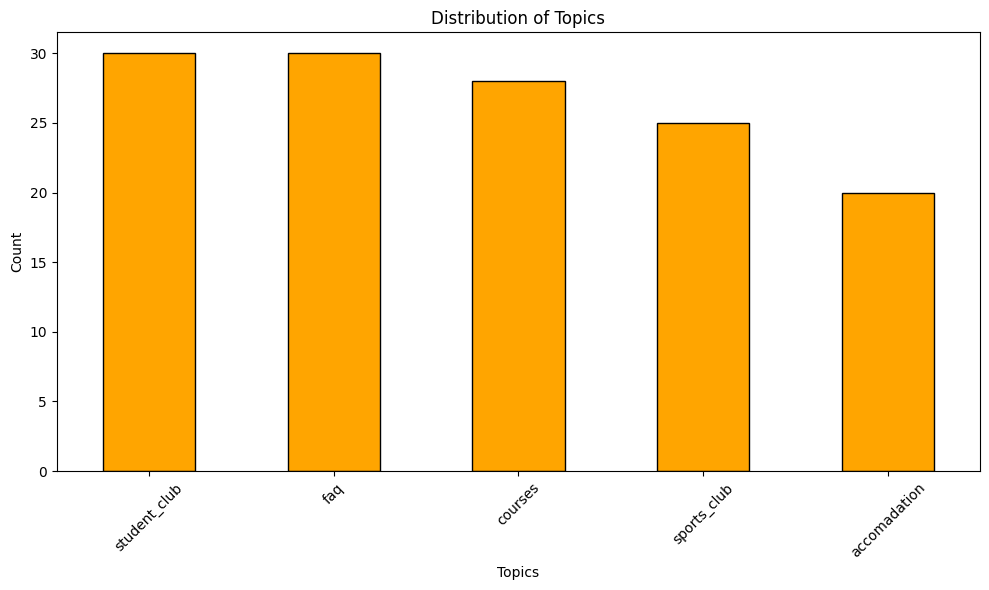

In [7]:
# Calculate topic distribution
topic_counts = dataset['topics'].value_counts()

plt.figure(figsize=(10, 6))
topic_counts.plot(kind='bar', color='#FFA500', edgecolor='black')
plt.title('Distribution of Topics')
plt.xlabel('Topics')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Distribution of Single-Hop vs Multi-Hop Queries

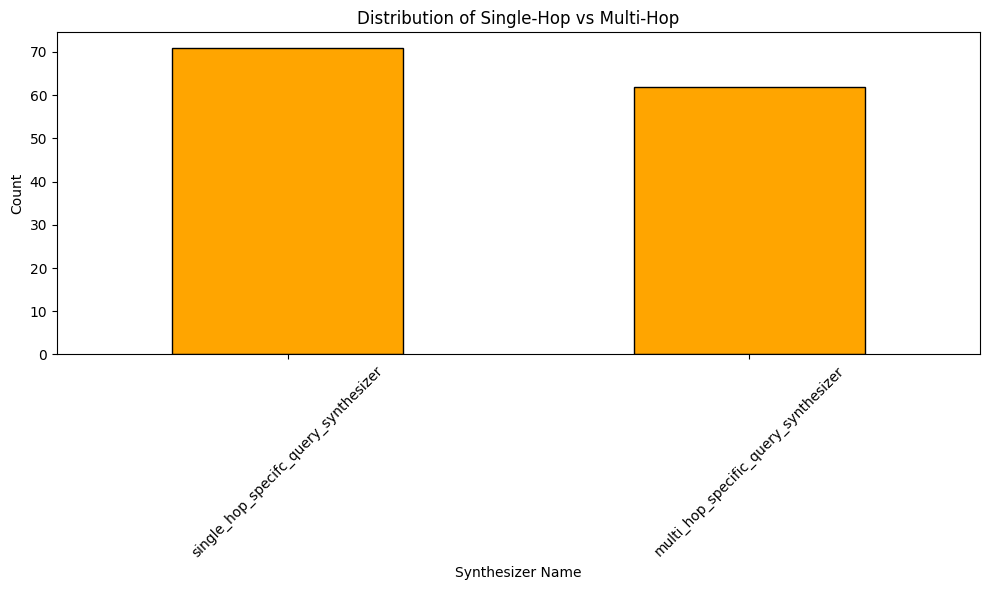

In [8]:
# Synthesizer Name distribution
synth_counts = dataset['synthesizer_name'].value_counts()

plt.figure(figsize=(10, 6))
synth_counts.plot(kind='bar', color='#FFA500', edgecolor='black')
plt.title('Distribution of Single-Hop vs Multi-Hop')
plt.ylabel('Count')
plt.xlabel('Synthesizer Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Distribution of Languages

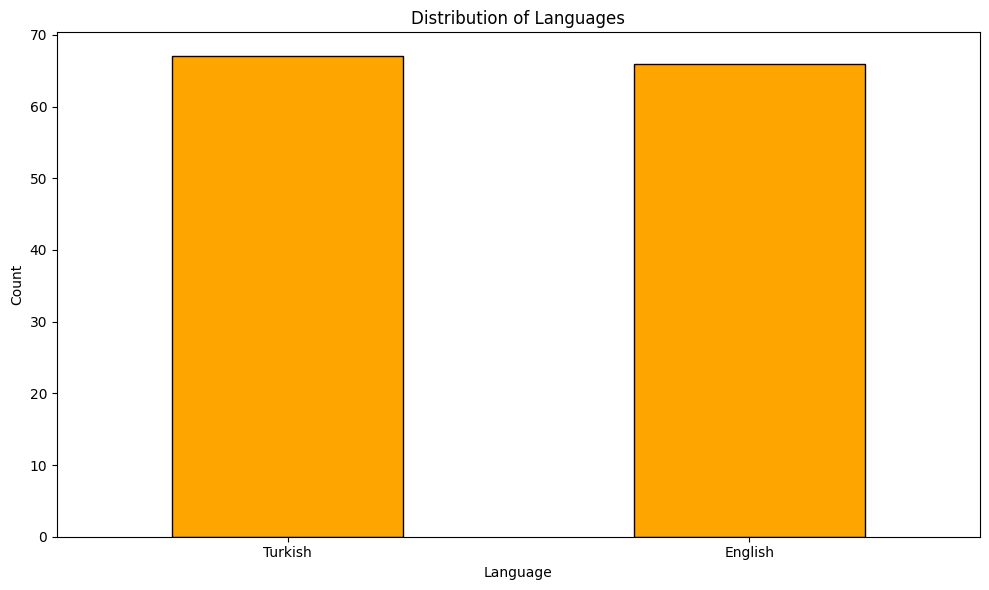

In [9]:
# Language distribution
language_counts = dataset['language'].value_counts()

plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar', color='#FFA500', edgecolor='black')
plt.title('Distribution of Languages')
plt.ylabel('Count')
plt.xlabel('Language')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()